### Çoklu Test

Birden fazla grubu teste sokmak istersek bu testi kullanırız.

    1-Varsayımlar: Normal dağılım, Varyans Homojenliği
    2-Örnek Uygulama: İş yerinin web sitesinde 3 ayrı deneme yapılıyor. Birinci site Normal
        ikinci site yönlendirici, ilgi çekici.Hangisinin daha fazla kullanıcıyı tutma süreleri karşılaştırılmak
        isteniyor.

In [2]:
import numpy as np,seaborn as sns, pandas as pd

In [3]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Normallik testi

<AxesSubplot: ylabel='Count'>

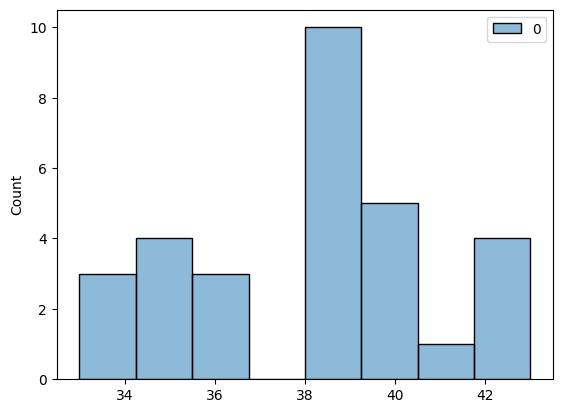

In [18]:
#Histogram
sns.histplot(data = C,bins=8)

In [24]:
#Shapiro-wiks
from scipy.stats import shapiro
[shapiro(A)[1],shapiro(B)[1],shapiro(C)[1]]

[0.5321670174598694, 0.7979751229286194, 0.273820161819458]

<b>Normallik sağlandı

In [27]:
import scipy.stats as stats
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

<b>Homojenlik varsayimida saglandi dolayisiyla hipotez testine gecebiliriz.
   

## Hipotez Testi

In [31]:
from scipy.stats import f_oneway
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

P value degeri oldukca kucuk oldugundan h0 hipotezini reddedemiyoruz
Dolayisiyla siteler arasinda oldukca anlamli bir fark bilimsel olarak %95 olasikla vardir ve diger degerlerede bakarak yorumlayabiliriz ki:

<AxesSubplot: >

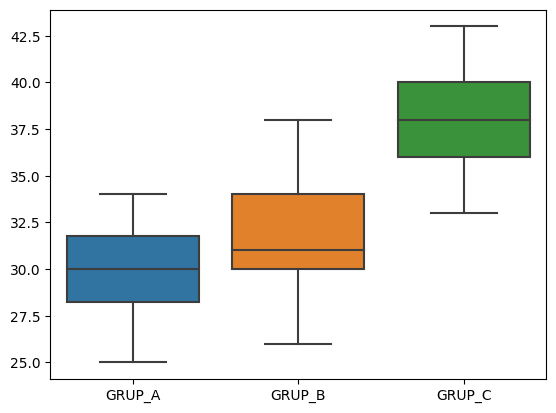

In [32]:
sns.boxplot(data = ABC)

Bu durumda C sitesi digerlerine gore daha uzun zaman kullaniciyi sitede tutabiliyor.
Bu sirasiyla B ve A olarak devam eder.

## Varsayımlar sağlanmasaydı !!

In [33]:
from scipy.stats import kruskal

In [35]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

P value degeri tekrar kucuk cikti bu durumda ayni sonuclari kabulleniyor olacaktik